# Analyzing Car Accidents in Canada from 1999 - 2014 using a distributed environment in PySpark

In [1]:
import pyspark as py
import pandas as pd
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('analysis').getOrCreate()
df = spark.read.csv('NCDB_1999_to_2014.csv',header=True)
df.show(10,False)

+------+------+------+------+-----+------+------+------+------+------+------+------+----+------+------+----+-----+-----+-----+------+------+------+
|C_YEAR|C_MNTH|C_WDAY|C_HOUR|C_SEV|C_VEHS|C_CONF|C_RCFG|C_WTHR|C_RSUR|C_RALN|C_TRAF|V_ID|V_TYPE|V_YEAR|P_ID|P_SEX|P_AGE|P_PSN|P_ISEV|P_SAFE|P_USER|
+------+------+------+------+-----+------+------+------+------+------+------+------+----+------+------+----+-----+-----+-----+------+------+------+
|1999  |01    |1     |20    |2    |02    |34    |UU    |1     |5     |3     |03    |01  |06    |1990  |01  |M    |41   |11   |1     |UU    |1     |
|1999  |01    |1     |20    |2    |02    |34    |UU    |1     |5     |3     |03    |02  |01    |1987  |01  |M    |19   |11   |1     |UU    |1     |
|1999  |01    |1     |20    |2    |02    |34    |UU    |1     |5     |3     |03    |02  |01    |1987  |02  |F    |20   |13   |2     |02    |2     |
|1999  |01    |1     |08    |2    |01    |01    |UU    |5     |3     |6     |18    |01  |01    |1986  |01  |M   

In [3]:
print("Total Rows in Dataset:",df.select("*").count())

Total Rows in Dataset: 5860405


In [4]:
print("Name of Columns - Printing for reference")
df.schema.names

Name of Columns - Printing for reference


['C_YEAR',
 'C_MNTH',
 'C_WDAY',
 'C_HOUR',
 'C_SEV',
 'C_VEHS',
 'C_CONF',
 'C_RCFG',
 'C_WTHR',
 'C_RSUR',
 'C_RALN',
 'C_TRAF',
 'V_ID',
 'V_TYPE',
 'V_YEAR',
 'P_ID',
 'P_SEX',
 'P_AGE',
 'P_PSN',
 'P_ISEV',
 'P_SAFE',
 'P_USER']

In [5]:
###################
###Cleaning Data###
###################
df = df.select("*").filter(col("C_MNTH").cast("int").isNotNull())

# Total No. of Collisions together for a month.

In [114]:
collisions_month_together = df.select(col("C_MNTH").alias("Month")).groupBy("Month").count().sort("Month")
collisions_month_together.show(collisions_month_together.count(),False)

+-----+------+
|Month|count |
+-----+------+
|01   |499874|
|02   |423287|
|03   |417814|
|04   |392533|
|05   |468235|
|06   |520010|
|07   |537693|
|08   |547045|
|09   |512790|
|10   |515911|
|11   |499080|
|12   |525748|
+-----+------+



In [115]:
collisions_month_together_pandas_df = collisions_month_together.select("*").toPandas()

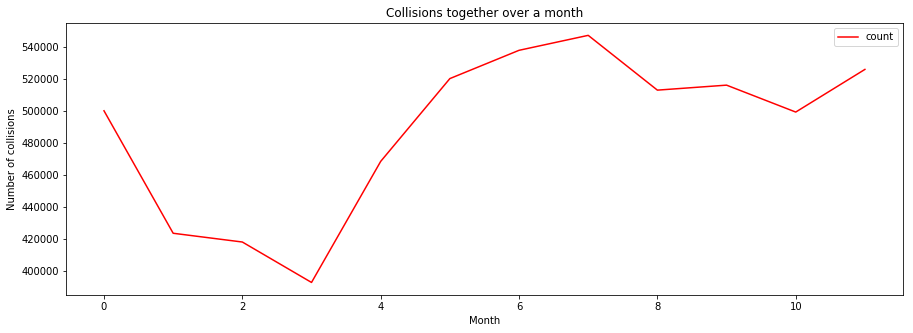

In [116]:
collisions_month_together = collisions_month_together_pandas_df.plot(figsize=(15,5),title='Collisions together over a month',color='red')
collisions_month_together.set_xlabel("Month")
collisions_month_together.set_ylabel("Number of collisions");

# Collisions grouped by the Day of Week

In [122]:
collisions_week_together = df.select(col("C_WDAY").alias("Day")).filter(col("Day") != "U").groupBy("Day").count().sort("Day")
collisions_week_together.show(collisions_week_together.count(),False)

+---+------+
|Day|count |
+---+------+
|1  |776012|
|2  |816265|
|3  |825560|
|4  |869653|
|5  |999725|
|6  |867188|
|7  |704679|
+---+------+



In [123]:
collisions_week_together_pandas_df = collisions_week_together.select("*").toPandas()

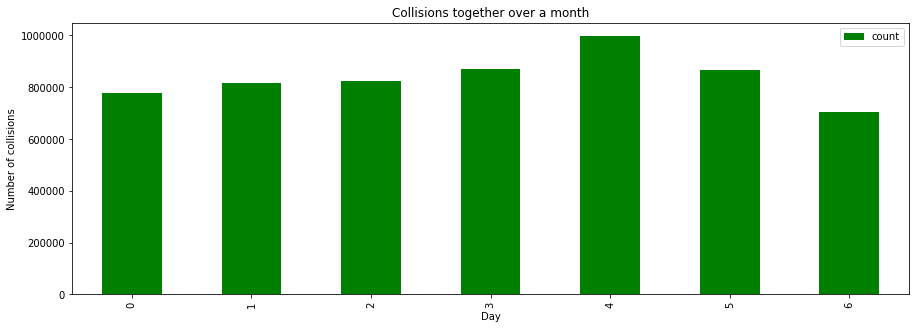

In [143]:
collisions_week_together = collisions_week_together_pandas_df.plot.bar(figsize=(15,5),title='Collisions together over a month',color='green')
collisions_week_together.set_xlabel("Day")
collisions_week_together.set_ylabel("Number of collisions");

# Collisions grouped by the Hour of Day

In [144]:
collisions_hour_together = df.select(col("C_HOUR").alias("Hour")).filter(col("Hour") != "UU").groupBy("Hour").count().sort("Hour")
collisions_hour_together.show(collisions_hour_together.count(),False)

+----+------+
|Hour|count |
+----+------+
|00  |88477 |
|01  |73379 |
|02  |77496 |
|03  |64036 |
|04  |39815 |
|05  |44950 |
|06  |106083|
|07  |207963|
|08  |302823|
|09  |227623|
|10  |248978|
|11  |301912|
|12  |368272|
|13  |367313|
|14  |397339|
|15  |492726|
|16  |519589|
|17  |500199|
|18  |375889|
|19  |281854|
|20  |217270|
|21  |204317|
|22  |164872|
|23  |127692|
+----+------+



In [145]:
collisions_hour_together_pandas_df = collisions_hour_together.select("*").toPandas()

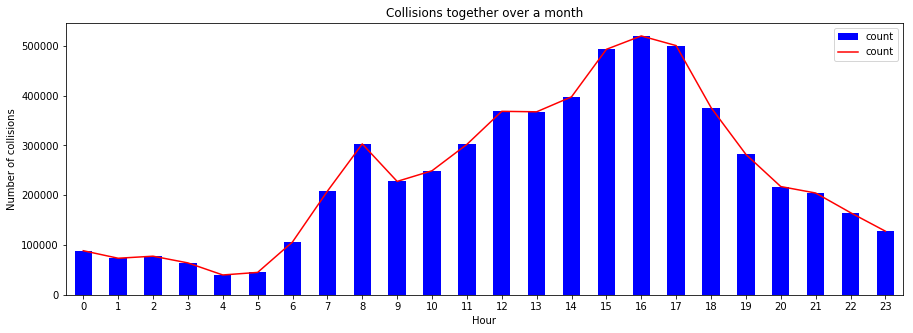

In [146]:
collisions_hour_together = collisions_hour_together_pandas_df.plot.bar(figsize=(15,5), label = "Bar" , title='Collisions together over a month',color='blue')
collisions_hour_together_pandas_df.plot(ax = collisions_hour_together, figsize=(15,5), label = "Line", title='Collisions together over a month',color='red')

collisions_hour_together.set_xlabel("Hour")
collisions_hour_together.set_ylabel("Number of collisions");

# Total No. of collisions in a month for each month seperately

In [30]:
collisions_month = df.select(concat(col("C_YEAR"), lit("-"), col("C_MNTH")).alias("Date")).groupBy("Date").count()
collisions_month.show(collisions_month.count(),False)

+-------+-----+
|Date   |count|
+-------+-----+
|1999-10|36269|
|2013-05|25633|
|2009-07|30136|
|1999-11|34859|
|2002-11|36328|
|2013-09|28550|
|2007-05|29243|
|2010-08|31665|
|2008-02|27352|
|2009-01|29159|
|2005-07|36104|
|2005-09|33136|
|2000-05|33618|
|2001-12|38489|
|2013-12|28415|
|2004-05|30252|
|2006-07|34880|
|2010-11|29474|
|2003-02|31473|
|2013-06|27164|
|2001-06|36270|
|2005-12|35342|
|2006-05|31240|
|2008-09|28880|
|2006-04|26243|
|2007-08|33913|
|2010-02|22557|
|1999-06|37029|
|2001-05|33579|
|2005-02|26277|
|2001-11|34228|
|2000-08|38389|
|2004-04|25101|
|2006-09|33344|
|2002-04|27825|
|2003-07|36680|
|2010-04|23968|
|2002-03|32973|
|2011-05|24768|
|2000-02|30451|
|1999-02|26538|
|2000-01|35677|
|1999-05|35481|
|2002-12|38001|
|2012-08|30218|
|2004-02|27082|
|2012-02|22233|
|2006-03|26718|
|2010-03|21511|
|2000-07|38944|
|2001-10|35870|
|2004-11|31282|
|2007-07|33728|
|2012-04|21370|
|2003-12|34459|
|2010-01|25533|
|2010-09|29620|
|2012-05|26634|
|2005-10|33054|
|2006-08

In [39]:
collisions_month_pandas_df = collisions_month.select("*").toPandas()

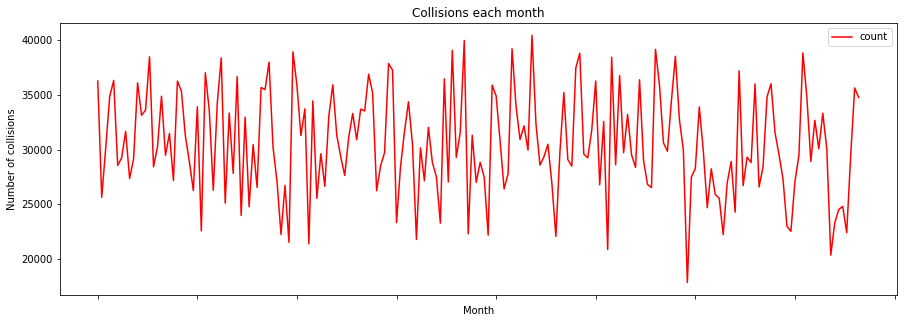

In [43]:
plot_collisions_month = collisions_month_pandas_df.plot(figsize=(15,5),x="Date",y="count",title='Collisions each month',color='red')
plot_collisions_month.set_xlabel("Month")
plot_collisions_month.set_ylabel("Number of collisions");

# No. of collisions grouped by severity in a month

In [69]:
severity = df.select(concat(col("C_YEAR"), lit("-"), col("C_MNTH")).alias("Date"), "C_SEV")
severity = severity.groupBy("Date","C_SEV").count()

severity_high = severity.filter(col("C_SEV") == 1)
severity_high.show(severity_high.count(),False)

severity_low = severity.filter(col("C_SEV") == 2)
severity_low.show(severity_low.count(),False)

+-------+-----+-----+
|Date   |C_SEV|count|
+-------+-----+-----+
|1999-07|1    |763  |
|2006-08|1    |768  |
|2003-07|1    |808  |
|2012-03|1    |424  |
|2008-11|1    |505  |
|1999-01|1    |433  |
|2002-09|1    |668  |
|2014-09|1    |406  |
|2005-06|1    |692  |
|2007-12|1    |609  |
|2008-01|1    |493  |
|2011-03|1    |332  |
|2003-08|1    |760  |
|2000-10|1    |617  |
|2003-02|1    |347  |
|2005-02|1    |403  |
|2012-01|1    |431  |
|2011-06|1    |500  |
|2004-06|1    |597  |
|2007-07|1    |620  |
|2014-03|1    |260  |
|2004-07|1    |712  |
|2000-09|1    |734  |
|2008-03|1    |371  |
|2010-10|1    |543  |
|2003-09|1    |604  |
|2013-11|1    |448  |
|2002-07|1    |714  |
|2008-10|1    |531  |
|1999-06|1    |645  |
|2005-10|1    |589  |
|2013-02|1    |280  |
|2003-05|1    |522  |
|2009-04|1    |325  |
|2009-07|1    |581  |
|2001-10|1    |571  |
|2010-11|1    |479  |
|2001-06|1    |656  |
|2012-09|1    |407  |
|2000-04|1    |471  |
|2013-03|1    |237  |
|2005-09|1    |589  |
|2011-10|1

In [93]:
severity_high_pandas_df = severity_high.select("*").toPandas()
severity_low_pandas_df = severity_low.select("*").toPandas()

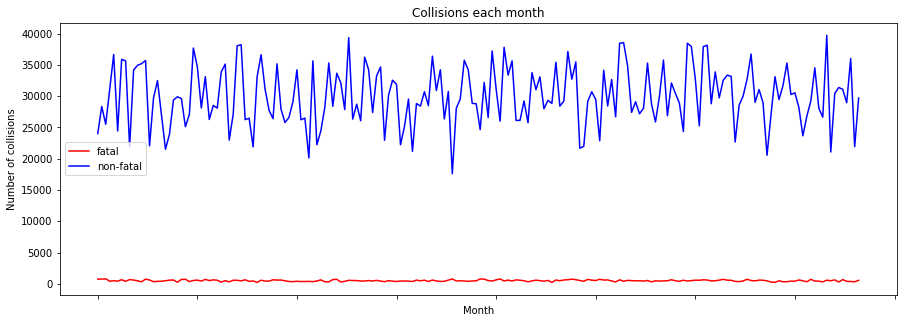

In [105]:
plot_severity_high = severity_high_pandas_df.plot(figsize=(15,5),label = "fatal", x="Date",y="count",title='Collisions each month',color='red')
plot_severity_low = severity_low_pandas_df.plot(ax = plot_severity_high, label = "non-fatal", figsize=(15,5),x="Date",y="count",title='Collisions each month',color='blue')
plot_severity_high.set_xlabel("Month")
plot_severity_high.set_ylabel("Number of collisions");

# No. of Collisions depending upon weather conditions

In [10]:
collisions_weather = df.select(col("C_WTHR").alias("Weather_Condition")).groupBy("Weather_Condition").count()
collisions_weather.sort("count").show(collisions_month.count(),False)

+-----------------+-------+
|Weather_Condition|count  |
+-----------------+-------+
|Q                |15011  |
|7                |15164  |
|5                |30330  |
|6                |82438  |
|U                |87769  |
|4                |354597 |
|3                |600099 |
|2                |600220 |
|1                |4074392|
+-----------------+-------+



1 Clear and sunny
2 Overcast, cloudy but no precipitation
3 Raining
4 Snowing, not including drifting snow
5 Freezing rain, sleet, hail
6 Visibility limitation e.g. drifting snow, fog, smog, dust, smoke, mist
7 Strong wind
Q Choice is other than the preceding values
U Unknown
X Jurisdiction does not provide this data element

# Severity of collisions based on weather

In [107]:
sev_collisions_weather = df.select(col("C_WTHR").alias("Weather_Condition"),col("C_SEV")).groupBy("Weather_Condition","C_SEV").count()
sev_collisions_weather = sev_collisions_weather.sort("count")

sev_high_collisions_weather = sev_collisions_weather.filter(col("C_SEV") == 1)
sev_low_collisions_weather = sev_collisions_weather.filter(col("C_SEV") == 2)

sev_high_collisions_weather.show(sev_high_collisions_weather.count(),False)
sev_low_collisions_weather.show(sev_low_collisions_weather.count(),False)

+-----------------+-----+-----+
|Weather_Condition|C_SEV|count|
+-----------------+-----+-----+
|Q                |1    |250  |
|7                |1    |580  |
|U                |1    |781  |
|5                |1    |810  |
|6                |1    |3447 |
|4                |1    |6907 |
|3                |1    |8262 |
|2                |1    |12518|
|1                |1    |65074|
+-----------------+-----+-----+

+-----------------+-----+-------+
|Weather_Condition|C_SEV|count  |
+-----------------+-----+-------+
|7                |2    |14584  |
|Q                |2    |14761  |
|5                |2    |29520  |
|6                |2    |78991  |
|U                |2    |86988  |
|4                |2    |347690 |
|2                |2    |587702 |
|3                |2    |591837 |
|1                |2    |4009318|
+-----------------+-----+-------+



In [108]:
sev_high_collisions_weather_pandas_df = sev_high_collisions_weather.select("*").toPandas()
sev_low_collisions_weather_pandas_df = sev_low_collisions_weather.select("*").toPandas()

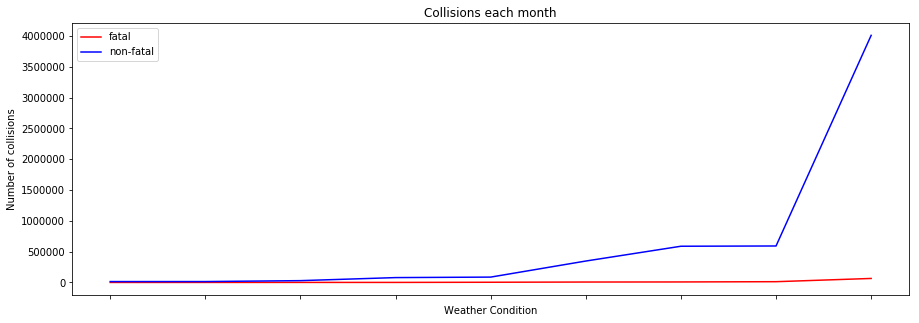

In [113]:
plot_severity_high_weather = sev_high_collisions_weather_pandas_df.plot(figsize=(15,5),label = "fatal", x="Weather_Condition",y="count",title='Collisions each month',color='red')
plot_severity_low_weather = sev_low_collisions_weather_pandas_df.plot(ax = plot_severity_high_weather, label = "non-fatal", figsize=(15,5),x="Weather_Condition",y="count",title='Collisions each month',color='blue')
plot_severity_high_weather.set_xlabel("Weather Condition")
plot_severity_high_weather.set_ylabel("Number of collisions");

# Severity by Day of Week